## Distinguishing Sentiments
HW#7
Due January 8, 2018

In this exercise I utilized Python libraries - pandas, numpy, matplotlib.pyplot, tweepy, seaborn, datetime, VADER - JSON traversals, and Twitter's API to perform a sentiment analysis on the news mood based on tweets from five different news organizations - __BBC, CBS, CNN, Fox News, and New York times__.

## Three observable trends based on the data below-
1.	The scatterplot reflecting the sentiment for the most recent one hundred tweets on Twitter for five major news organizations was highly variable ranging anywhere from ~-0.95 to +0.95, with -1 being the most negative sentiment, and +1 being the most positive sentiment, based on the VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis. Visually it was difficult to determine which news organizations had the most positive or negative sentiments based on the scatterplot alone. 

2.	Numerous points on the scatterplot were located at the 0 (zero) y-intercept. My first assumption was that these points simply represented an overwhelming number of tweets with neutral sentiment, but a closer look at the tweet text indicated that several of these “neutral” points also represented tweets in languages other than English, which could not be evaluated by VADER, and were, therefore, given a compound score of 0. I added a filter to my code so that only English tweets were counted and evaluated, but a few tweets in other languages still managed to come through in my analysis. 

3.	A bar plot representing the mean tweet sentiment made it easier to interpret the overall sentiment at a specific time for each news organization as being more positive or more negative. Having said that, the sentiment means for the same news organization varied tremendously from hour to hour, and day to day (data not shown). When I ran my code two days ago, which coincided with the release of the book “Fire and Fury: Inside the Trump White House” by Michael Wolff for example, all news organizations presented a negative mean sentiment. The bar plot below represents an analysis performed Sunday night (01/07/2018) with positive mean sentiment values for BBC, CBS and the NY Times (ranging from +0.06 to +0.09, a slightly negative mean for Fox News (- 0.03) and a negative sentiment mean for CNN (-0.1). I noticed that several of the tweets were about the Golden Globe Awards, which may partially explain the overall boost in tweet sentiment this evening, compared to earlier today. Overall, it would be best to sample tweets throughout a couple of months or a year to get a better idea of the overall sentiment for each news organization on Twitter.

In [1]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import numpy as np
from IPython.display import display
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#Set up and call config document
import yaml
TWITTER_CONFIG_FILE = 'auth.yaml'

with open (TWITTER_CONFIG_FILE, 'r') as config_file:
    config = yaml.load (config_file)
#print(type(config))

In [3]:
# Twitter API Keys
access_token = config ['twitter']['access_token']
access_token_secret = config ['twitter']['access_token_secret']
consumer_key= config['twitter']['consumer_key']
consumer_secret = config ['twitter']['consumer_secret']
#print(access_token, access_token_secret, consumer_key, consumer_secret)

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term
news_orgs = ("BBC", "CBS", "CNN","FoxNews","nytimes")
    
# Create arrays to hold sentiments for all news organizations
all_sentiments=[]
sentiment_means=[]

# Loop through all target news organizations
for org in news_orgs:
    
    # Reset counter for each news_org loop
    counter=1
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Run search for each tweet
    public_tweets = api.search(org, count=100, result_type="recent",lang='en')       
    #print(json.dumps(public_tweets["statuses"], indent=4, sort_keys=True, separators=(',',': ')))   
    
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate arrays above
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)  
        #print(org)
        #print (compound_list, tweets_ago)
        #print(" ")
        
        # Append all sentiments to an array
        all_sentiments.append({" Media" : org,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets_Ago": counter
                            })  
        # Add 1 to counter    
        counter+=1
        
    # Store the Average Sentiments into the array created above
    sentiment_means.append({" Media": org,
                    "Compound_Mean": np.mean(compound_list),
                    "Positive": np.mean(positive_list),
                    "Neutral": np.mean(negative_list),
                    "Negative": np.mean(neutral_list),
                    "Count": len(compound_list)
                    })

# Convert all_sentiments to DataFrame
all_sentiments_pd = pd.DataFrame.from_dict(all_sentiments)
all_sentiments_pd.to_csv("sentiments_array_pd.csv")
display(all_sentiments_pd)
#print(all_sentiments_pd.dtypes)

# Convert sentiment_means to DataFrame 
sentiment_means_pd = pd.DataFrame.from_dict(sentiment_means) 
display(sentiment_means_pd)

,Media,Compound,Date,Negative,Neutral,Positive,Tweets_Ago
0,BBC,0.0000,Mon Jan 08 07:04:28 +0000 2018,0.000,1.000,0.000,1
1,BBC,0.5719,Mon Jan 08 07:04:27 +0000 2018,0.000,0.850,0.150,2
2,BBC,-0.6597,Mon Jan 08 07:04:27 +0000 2018,0.306,0.694,0.000,3
3,BBC,0.7906,Mon Jan 08 07:04:26 +0000 2018,0.000,0.750,0.250,4
4,BBC,0.0000,Mon Jan 08 07:04:25 +0000 2018,0.000,1.000,0.000,5
5,BBC,0.5994,Mon Jan 08 07:04:25 +0000 2018,0.075,0.717,0.208,6
6,BBC,-0.5423,Mon Jan 08 07:04:25 +0000 2018,0.218,0.691,0.091,7
7,BBC,0.5719,Mon Jan 08 07:04:24 +0000 2018,0.000,0.575,0.425,8
8,BBC,0.5719,Mon Jan 08 07:04:23 +0000 2018,0.000,0.850,0.150,9
9,BBC,0.6369,Mon Jan 08 07:04:23 +0000 2018,0.000,0.755,0.245,10


,Media,Compound_Mean,Count,Negative,Neutral,Positive
0,BBC,0.083353,100,0.84301,0.06990,0.08707
1,CBS,0.061578,100,0.86744,0.05553,0.07701
2,CNN,-0.107187,100,0.82274,0.10897,0.06833
3,FoxNews,-0.028154,100,0.82891,0.09015,0.08093
4,nytimes,0.057799,100,0.86923,0.05773,0.07304


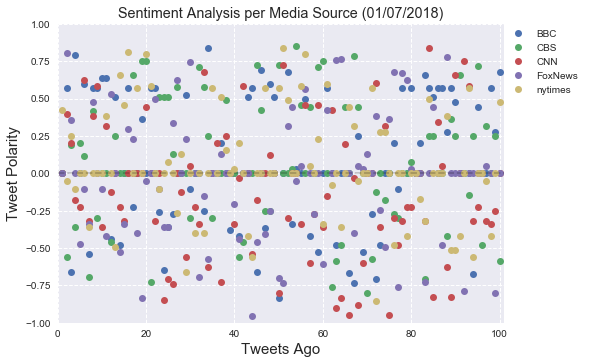

In [5]:
# Create a scatterplot
all_sentiments_pd.set_index('Tweets_Ago', inplace=True)
all_sentiments_pd.groupby(' Media')['Compound'].plot(legend=True, marker = 'o', linewidth=0)

# Customize scatterplot features
plt.style.use('ggplot')
plt.axhline(c='k', alpha=0.2, linestyle= 'dashed')
plt.axis([0,6,-1.1,1.1])
plt.xlim(0,101)
plt.ylim(-1,1)
plt.xlabel("Tweets Ago", fontsize=15)
plt.ylabel("Tweet Polarity", fontsize=15)
plt.legend(loc=(1.0, 0.75),edgecolor='black')
plt.grid(True, ls='dashed')
plt.title("Sentiment Analysis per Media Source" + " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.savefig("Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
plt.show()

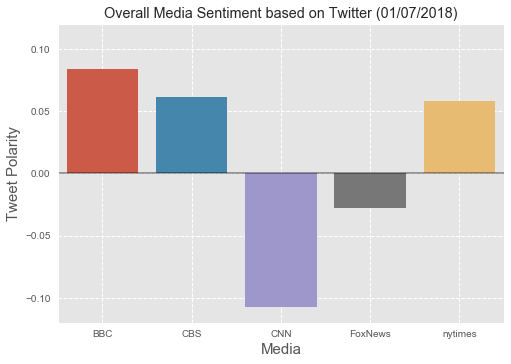

In [9]:
# Create a barplot
ax=sns.barplot(x=' Media', y='Compound_Mean', data=sentiment_means_pd)

# Customize barplot features
ax.set_xlabel('Media', fontsize=15)
ax.set_ylabel('Tweet Polarity', fontsize=15)
ax.set_title("Overall Media Sentiment based on Twitter"+ " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
ax.set_ylim(-0.12, 0.12)
ax.grid(True, ls='dashed')
ax.hlines(0, -1, 10, colors='k', alpha=0.4)
plt.savefig("Overall Sentiment based on Twitter.png")
plt.show()